<a href="https://colab.research.google.com/github/qwerlarlgus/CNN-Cats-Dogs/blob/main/2_dropout_batchnorm_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
!ls -l

total 111584
drwx------ 4 root root      4096 Jan 22 05:41 drive
drwxr-xr-x 1 root root      4096 Jan 20 17:27 sample_data
-rw------- 1 root root 114250866 Jan 21 04:51 training_data.zip


In [ ]:
!cp ./drive/MyDrive/training_data.zip .

cp: cannot stat './drive/MyDrive/training_data.zip': No such file or directory


In [ ]:
!unzip training_data.zip

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
IMG_DIM = (50, 50)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 50, 50, 3) 	Validation dataset shape: (1000, 50, 50, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(50, 50, 3)


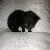

In [ ]:
print(train_imgs[90].shape)
array_to_img(train_imgs[90])

In [ ]:
batch_size = 50
num_classes = 2
epochs = 50
input_shape = (50, 50, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog'] [0 0 1 0 1 1 1 0 1 1]


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization 
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

### Model Case I 

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding="same",
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam', # optimizers.RMSprop(lr=0.0001)
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/50
60/60 [==============================] - 17s 275ms/step - loss: 0.7038 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.4990
Epoch 2/50
60/60 [==============================] - 14s 226ms/step - loss: 0.6598 - accuracy: 0.6036 - val_loss: 0.6178 - val_accuracy: 0.6690
Epoch 3/50
60/60 [==============================] - 14s 227ms/step - loss: 0.5850 - accuracy: 0.6871 - val_loss: 0.6091 - val_accuracy: 0.6820
Epoch 4/50
60/60 [==============================] - 14s 227ms/step - loss: 0.5349 - accuracy: 0.7290 - val_loss: 0.5853 - val_accuracy: 0.6930
Epoch 5/50
60/60 [==============================] - 14s 228ms/step - loss: 0.5139 - accuracy: 0.7423 - val_loss: 0.5837 - val_accuracy: 0.7270
Epoch 6/50
60/60 [==============================] - 14s 226ms/step - loss: 0.4788 - accuracy: 0.7722 - val_loss: 0.5604 - val_accuracy: 0.7250
Epoch 7/50
60/60 [==============================] - 13s 225ms/step - loss: 0.3837 - accuracy: 0.8215 - val_loss: 0.5661 - val_accuracy: 0.7170

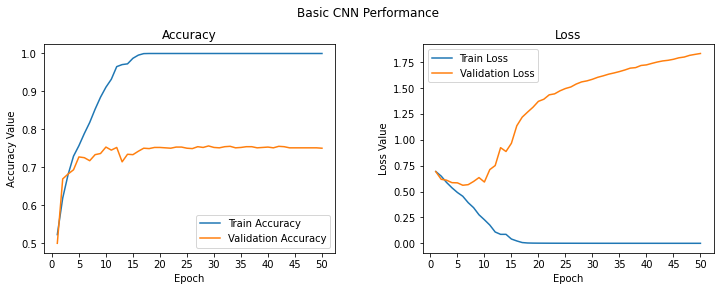

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('2-dropout-batchnorm-cnn.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
